# Descriptive Analysis

Import the necessary libraries

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
from prince import PCA
from prince import MCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency

Reading the excel file

In [82]:
df = pd.read_excel("Data/Visualization_Data.xlsx")

Percentage of students with MDD

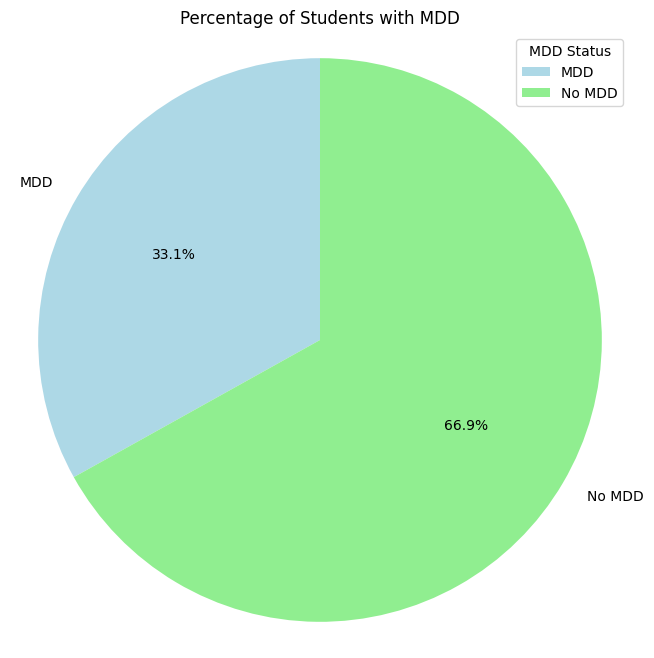

In [83]:
df_copy = df.copy()

# Group by the depression status and sum weights for each group
weighted_counts = df_copy.groupby('depression_status')['Post_Stratification_Weight'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(weighted_counts, labels=weighted_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Percentage of Students with MDD')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title='MDD Status')
plt.show()


Depression with Gender

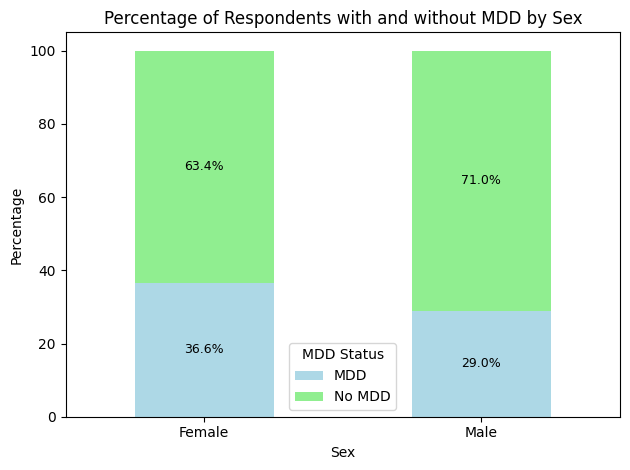

In [84]:
# Group by Sex and depression status and sum weights for each group
group_data = df.groupby(['Sex', 'depression_status'])['Post_Stratification_Weight'].sum().unstack(fill_value=0)

# Normalize data by sex to get percentages
group_data_percentage = group_data.div(group_data.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
ax = group_data_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'])
plt.title('Percentage of Respondents with and without MDD by Sex')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='MDD Status')

# Annotating the percentage on each bar
for n, x in enumerate([*group_data_percentage.index.values]):
    for (proportion, y_loc) in zip(group_data_percentage.loc[x],
                                   group_data_percentage.loc[x].cumsum()):
        plt.text(x=n, y=(y_loc - proportion) + (proportion / 2), s=f'{proportion:.1f}%', 
                 ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

In [88]:
# Create a contingency table
contingency_table = pd.crosstab(df['depression_status'], df['Sex'])

# Perform the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Check if there is a significant relationship
significance_level = 0.05
is_significant = p < significance_level

# Print the results
print(f"Chi-squared Test Statistic: {chi2}")
print(f"P-value: {p}")
print("Significant Relationship:" if is_significant else "No Significant Relationship")

Chi-squared Test Statistic: 1.2777455380492437
P-value: 0.25831863551847867
No Significant Relationship


Depression with Alcohol Consumption

C:\Users\Acer\AppData\Local\Temp\ipykernel_20888\366249763.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = df.groupby(['Alcohol_Frequency', 'depression_status'])['Post_Stratification_Weight'].sum().unstack(fill_value=0)


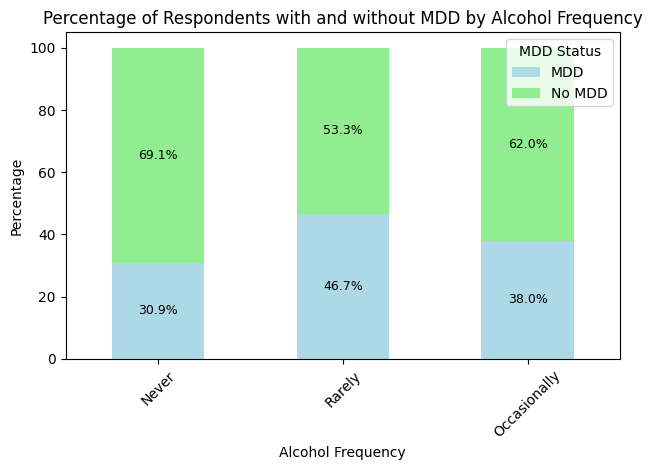

In [55]:
# Define the desired order for the Alcohol_Frequency category
category_order = pd.CategoricalDtype(['Never', 'Rarely', 'Occasionally'], ordered=True)
df['Alcohol_Frequency'] = pd.Categorical(df['Alcohol_Frequency'], categories=category_order.categories, ordered=True)


# Group by Alcohol_Frequency and depression status and sum weights for each group
group_data = df.groupby(['Alcohol_Frequency', 'depression_status'])['Post_Stratification_Weight'].sum().unstack(fill_value=0)

# Normalize data by Alcohol_Frequency to get percentages
group_data_percentage = group_data.div(group_data.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
ax = group_data_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'])
plt.title('Percentage of Respondents with and without MDD by Alcohol Frequency')
plt.xlabel('Alcohol Frequency')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='MDD Status')

# Annotating the percentage on each bar
for n, x in enumerate([*group_data_percentage.index.values]):
    for (proportion, y_loc) in zip(group_data_percentage.loc[x],
                                   group_data_percentage.loc[x].cumsum()):
        plt.text(x=n, y=(y_loc - proportion) + (proportion / 2), s=f'{proportion:.1f}%', 
                 ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


Depression with Alocohol Consumption in Females

C:\Users\Acer\AppData\Local\Temp\ipykernel_20888\4051356074.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['Alcohol_Frequency'] = pd.Categorical(df_female['Alcohol_Frequency'], categories=category_order.categories, ordered=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_20888\4051356074.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = df_female.groupby(['Alcohol_Frequency', 'depression_status'])['Post_Stratification_Weight'].sum().unstack(fill_value=0)


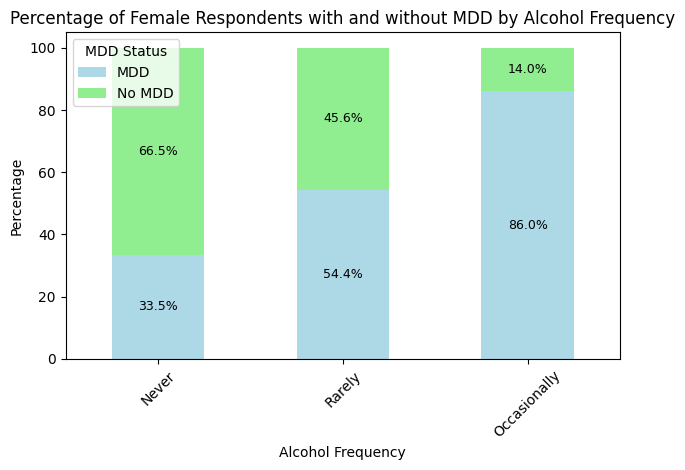

In [56]:
# Filter for only Female data
df_female = df[df['Sex'] == 'Female']

# Define the desired order for the Alcohol_Frequency category
category_order = pd.CategoricalDtype(['Never', 'Rarely', 'Occasionally'], ordered=True)
df_female['Alcohol_Frequency'] = pd.Categorical(df_female['Alcohol_Frequency'], categories=category_order.categories, ordered=True)

# Group by Alcohol_Frequency and depression status and sum weights for each group
group_data = df_female.groupby(['Alcohol_Frequency', 'depression_status'])['Post_Stratification_Weight'].sum().unstack(fill_value=0)

# Normalize data by Alcohol_Frequency to get percentages
group_data_percentage = group_data.div(group_data.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
ax = group_data_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'])
plt.title('Percentage of Female Respondents with and without MDD by Alcohol Frequency')
plt.xlabel('Alcohol Frequency')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='MDD Status')

# Annotating the percentage on each bar
for n, x in enumerate([*group_data_percentage.index.values]):
    for (proportion, y_loc) in zip(group_data_percentage.loc[x],
                                  group_data_percentage.loc[x].cumsum()):
        plt.text(x=n, y=(y_loc - proportion) + (proportion / 2), s=f'{proportion:.1f}%', 
                 ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


Year of study with Depression

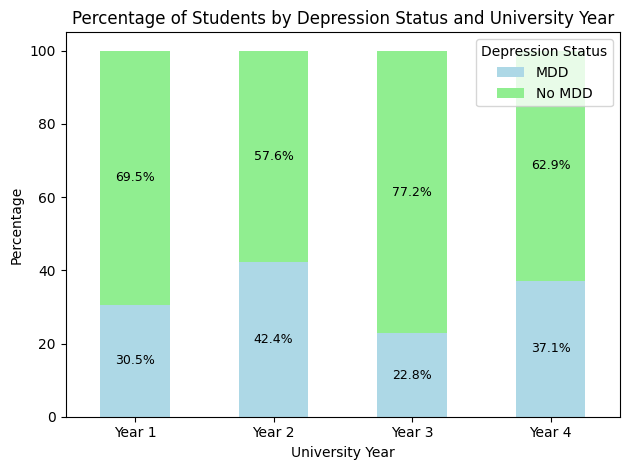

In [57]:
# Group by Uni_Year and depression status and sum weights for each group
group_data = df.groupby(['Uni_Year', 'depression_status'])['Post_Stratification_Weight'].sum().unstack(fill_value=0)

# Normalize data by Uni_Year to get percentages
group_data_percentage = group_data.div(group_data.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
ax = group_data_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'])
plt.title('Percentage of Students by Depression Status and University Year')
plt.xlabel('University Year')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Depression Status')

# Annotating the percentage on each bar
for n, x in enumerate([*group_data_percentage.index.values]):
    for (proportion, y_loc) in zip(group_data_percentage.loc[x],
                                  group_data_percentage.loc[x].cumsum()):
        plt.text(x=n, y=(y_loc - proportion) + (proportion / 2), s=f'{proportion:.1f}%', 
                 ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


University Year with Stress

In [58]:
#Let us Categorize the Academic Stress as Low Stress, Moderate Stress and High Stress

# Dictionary to map the stress levels
stress_mapping = {
    1: 'Low Stress',
    2: 'Low Stress',
    3: 'Moderate Stress',
    4: 'High Stress',
    5: 'High Stress'
}

# Map the values using the dictionary
df['Academic_Stress_Categorized'] = df['Academic_Stress'].map(stress_mapping)


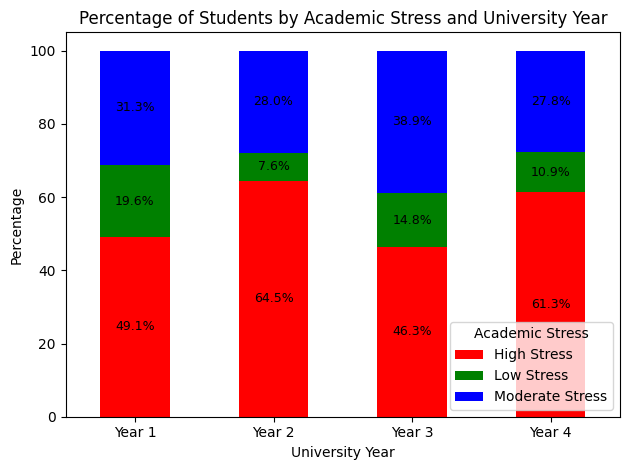

In [74]:
# Group by Uni_Year and Academic_Stress and sum weights for each group
group_data = df.groupby(['Uni_Year', 'Academic_Stress_Categorized'])['Post_Stratification_Weight'].sum().unstack(fill_value=0)

# Normalize data by Uni_Year to get percentages
group_data_percentage = group_data.div(group_data.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
ax = group_data_percentage.plot(kind='bar', stacked=True, color=['red', 'green', 'blue'])
plt.title('Percentage of Students by Academic Stress and University Year')
plt.xlabel('University Year')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Academic Stress',loc='lower right')

# Annotating the percentage on each bar
for n, x in enumerate([*group_data_percentage.index.values]):
    for (proportion, y_loc) in zip(group_data_percentage.loc[x],
                                  group_data_percentage.loc[x].cumsum()):
        plt.text(x=n, y=(y_loc - proportion) + (proportion / 2), s=f'{proportion:.1f}%', 
                 ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


Depression and Satisfaction with academic acheivements

In [60]:
#Make a copy of the dataframe
df_new = df.copy()

# Define the desired order for Academic_Achievements_Satisfaction and filter out 'No GPA as of yet'
category_order = ['No', 'Neither satisfied nor dissatisfied', 'Yes']
df_new['Academic_Achievements_Satisfaction'] = pd.Categorical(df_new['Academic_Achievements_Satisfaction'], categories=category_order, ordered=True)
df_new = df_new[df_new['Academic_Achievements_Satisfaction'] != 'No GPA as of yet']

# Group by Academic_Achievements_Satisfaction and depression status and sum weights for each group
group_data = df_new.groupby(['Academic_Achievements_Satisfaction', 'depression_status'])['Post_Stratification_Weight'].sum().unstack(fill_value=0)


C:\Users\Acer\AppData\Local\Temp\ipykernel_20888\2795773293.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = df_new.groupby(['Academic_Achievements_Satisfaction', 'depression_status'])['Post_Stratification_Weight'].sum().unstack(fill_value=0)


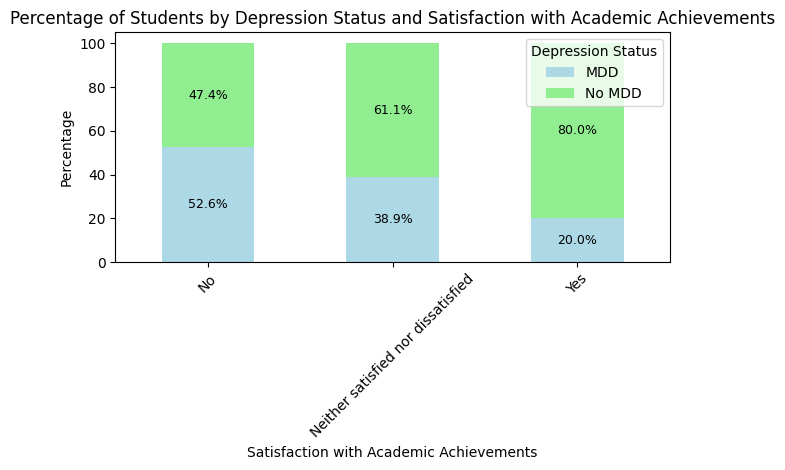

In [61]:

# Normalize data by Academic_Achievements_Satisfaction to get percentages
group_data_percentage = group_data.div(group_data.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
ax = group_data_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'])
plt.title('Percentage of Students by Depression Status and Satisfaction with Academic Achievements')
plt.xlabel('Satisfaction with Academic Achievements')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Depression Status')

# Annotating the percentage on each bar
for n, x in enumerate([*group_data_percentage.index.values]):
    for (proportion, y_loc) in zip(group_data_percentage.loc[x],
                                  group_data_percentage.loc[x].cumsum()):
        plt.text(x=n, y=(y_loc - proportion) + (proportion / 2), s=f'{proportion:.1f}%', 
                 ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

Income and Depression

C:\Users\Acer\AppData\Local\Temp\ipykernel_20888\1274870884.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = df_copy.groupby(['Income_Encoded', 'depression_status'])['Post_Stratification_Weight'].sum().unstack(fill_value=0)


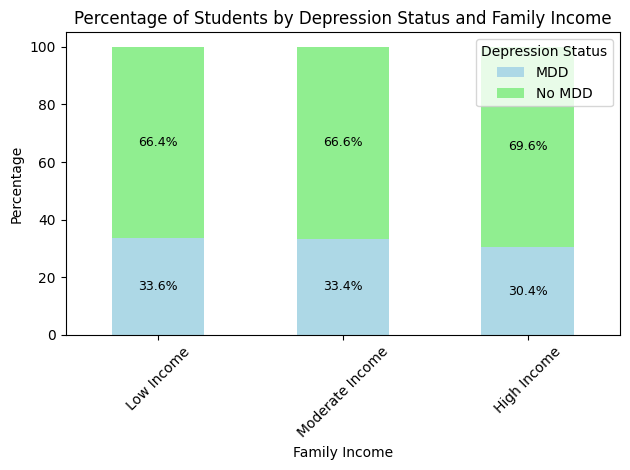

In [62]:
# Dictionary to map the stress levels
income_mapping = {
    'Less than 30,000':'Low Income', 
    '30,000-100,000': 'Low Income',
    '100,00-250,000': 'Moderate Income',
    '250,000-500,000': 'High Income',
    'Greater than 500,000': 'High Income',
}

# Map the values using the dictionary
df['Income_Encoded'] = df['Family_Income'].map(income_mapping)

# Define the desired order for Family_Income categories
income_order = [
 'Low Income',
 'Moderate Income',
 'High Income'
]

#Make a copy
df_copy = df.copy()

#Order the categories
df_copy['Income_Encoded'] = pd.Categorical(df_copy['Income_Encoded'], categories=income_order, ordered=True)

# Group by Family_Income and depression status and sum weights for each group
group_data = df_copy.groupby(['Income_Encoded', 'depression_status'])['Post_Stratification_Weight'].sum().unstack(fill_value=0)

# Normalize data by Family_Income to get percentages
group_data_percentage = group_data.div(group_data.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
ax = group_data_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'])
plt.title('Percentage of Students by Depression Status and Family Income')
plt.xlabel('Family Income')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Depression Status')

# Annotating the percentage on each bar
for n, x in enumerate([*group_data_percentage.index.values]):
    for (proportion, y_loc) in zip(group_data_percentage.loc[x],
                                  group_data_percentage.loc[x].cumsum()):
        plt.text(x=n, y=(y_loc - proportion) + (proportion / 2), s=f'{proportion:.1f}%', 
                 ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

Harassment and Depression

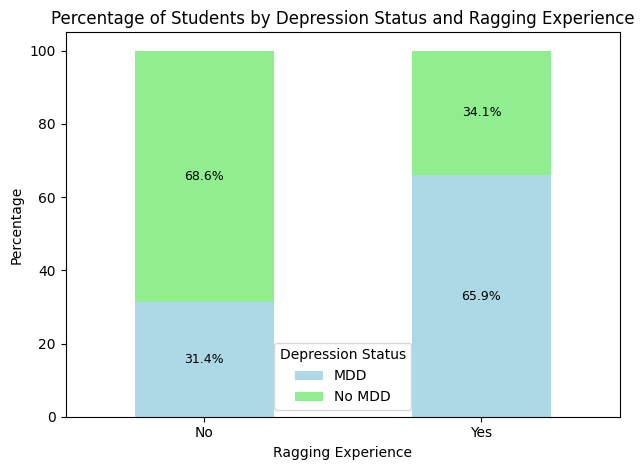

In [63]:
# Group by Ragging_Experience and depression status and sum weights for each group
group_data = df.groupby(['Ragging_Experience', 'depression_status'])['Post_Stratification_Weight'].sum().unstack(fill_value=0)

# Normalize data by Ragging_Experience to get percentages
group_data_percentage = group_data.div(group_data.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
ax = group_data_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'])
plt.title('Percentage of Students by Depression Status and Ragging Experience')
plt.xlabel('Ragging Experience')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Depression Status')

# Annotating the percentage on each bar
for n, x in enumerate([*group_data_percentage.index.values]):
    for (proportion, y_loc) in zip(group_data_percentage.loc[x],
                                  group_data_percentage.loc[x].cumsum()):
        plt.text(x=n, y=(y_loc - proportion) + (proportion / 2), s=f'{proportion:.1f}%', 
                 ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

Recently breaking up with Depression

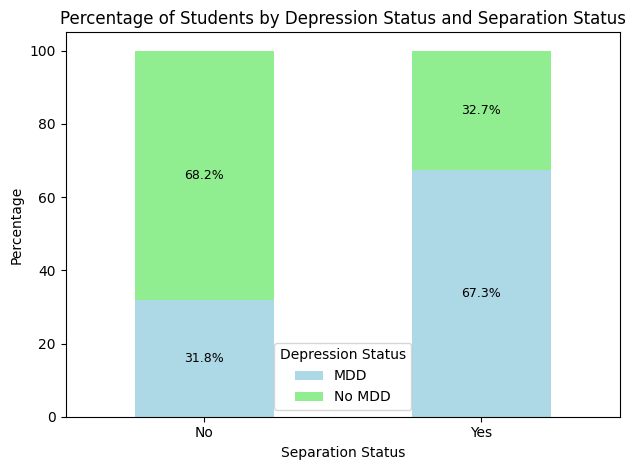

In [64]:
# Group by Separated and depression status and sum weights for each group
group_data = df.groupby(['Separated', 'depression_status'])['Post_Stratification_Weight'].sum().unstack(fill_value=0)

# Normalize data by Separated to get percentages
group_data_percentage = group_data.div(group_data.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
ax = group_data_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'])
plt.title('Percentage of Students by Depression Status and Separation Status')
plt.xlabel('Separation Status')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Depression Status')

# Annotating the percentage on each bar
for n, x in enumerate([*group_data_percentage.index.values]):
    for (proportion, y_loc) in zip(group_data_percentage.loc[x],
                                  group_data_percentage.loc[x].cumsum()):
        plt.text(x=n, y=(y_loc - proportion) + (proportion / 2), s=f'{proportion:.1f}%', 
                 ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

Recently breaking with Depression for the different Genders

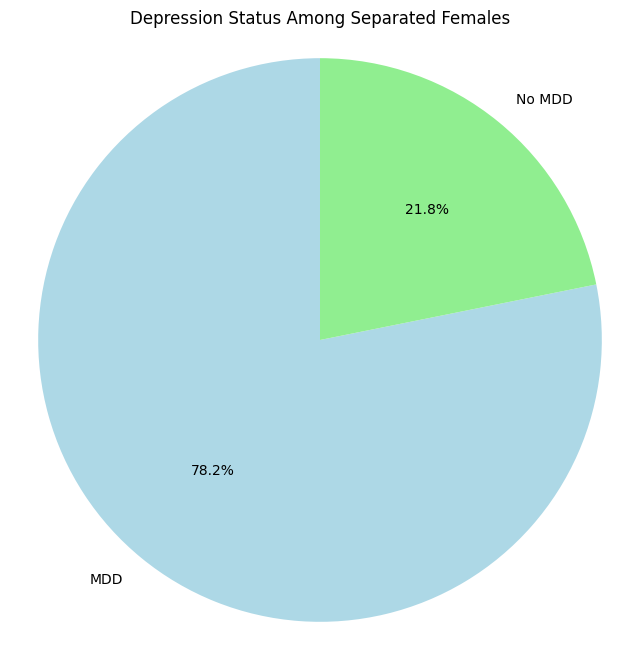

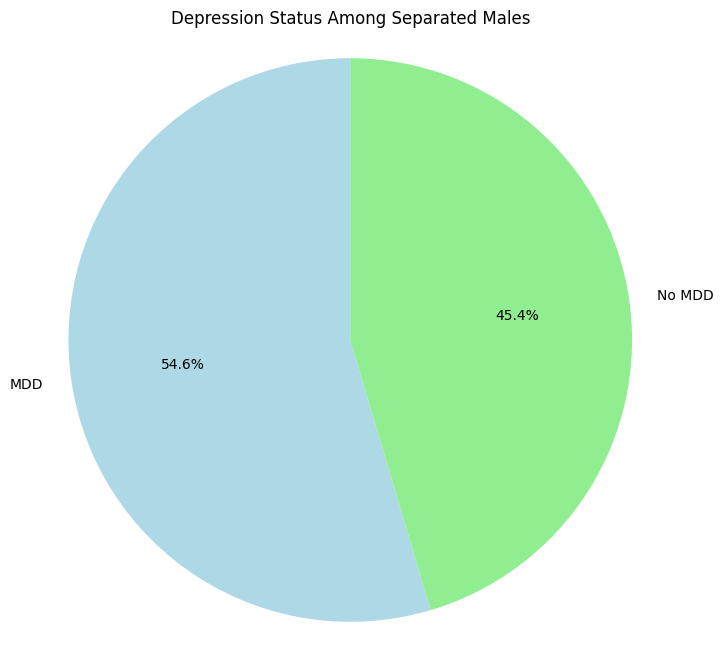

In [77]:

# Filter to include only separated individuals
df_separated = df[df['Separated'] == 'Yes']

# Separate dataframes for females and males
df_female = df_separated[df_separated['Sex'] == 'Female']
df_male = df_separated[df_separated['Sex'] == 'Male']

# Function to create a pie chart for a given DataFrame
def create_pie_chart(df, title):
    weighted_counts = df.groupby('depression_status')['Post_Stratification_Weight'].sum()
    plt.figure(figsize=(8, 8))
    plt.pie(weighted_counts, labels=weighted_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Create pie charts
create_pie_chart(df_female, 'Depression Status Among Separated Females')
create_pie_chart(df_male, 'Depression Status Among Separated Males')

Depression with the level of satisfaction of the relationship

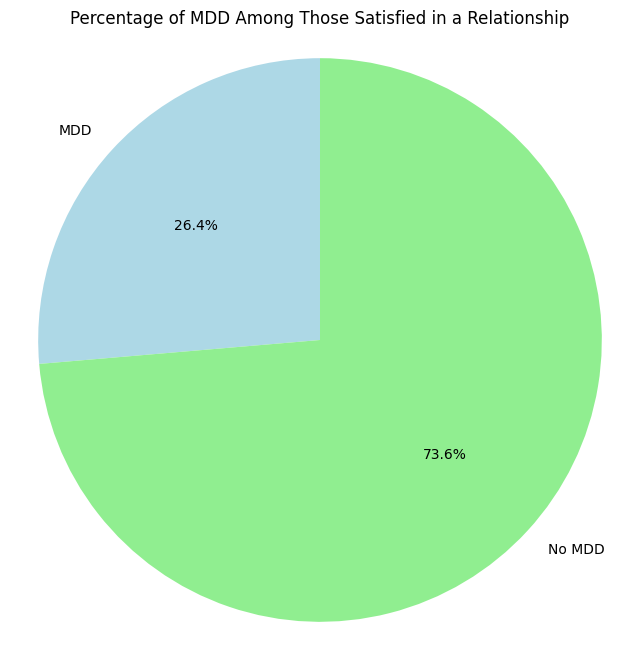

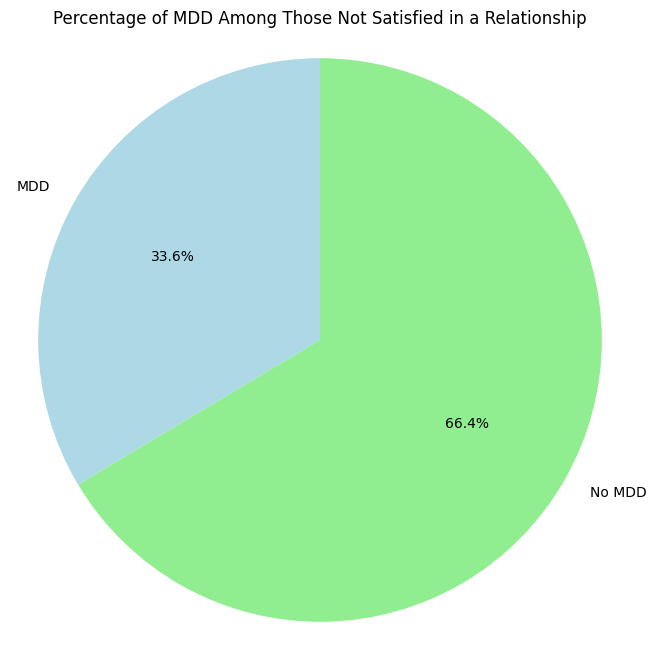

In [79]:
# Function to create a pie chart for given conditions
def create_pie_chart(df, condition_column, title):
    # Filter DataFrame based on condition
    df_filtered = df[df[condition_column] == 'Yes']
    # Group by depression status and sum weights for each group
    weighted_counts = df_filtered.groupby('depression_status')['Post_Stratification_Weight'].sum()
    plt.figure(figsize=(8, 8))
    plt.pie(weighted_counts, labels=weighted_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Create pie charts for those satisfied and not satisfied in a love affair
create_pie_chart(df, 'Love_Affair_Satisfied', 'Percentage of MDD Among Those Satisfied in a Relationship')
create_pie_chart(df, 'Love_Affair_Not_Satisfied', 'Percentage of MDD Among Those Not Satisfied in a Relationship')

Depression among those in a relationship which is not satisfactory seperated by gender

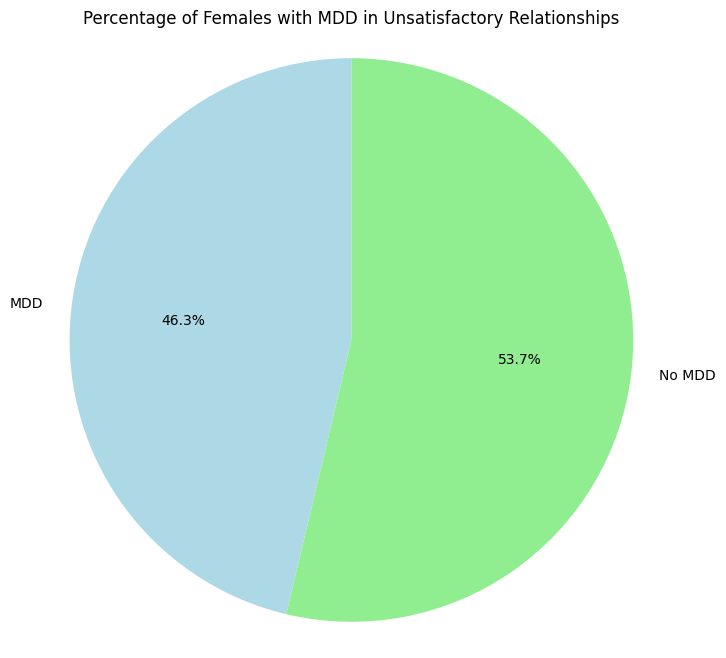

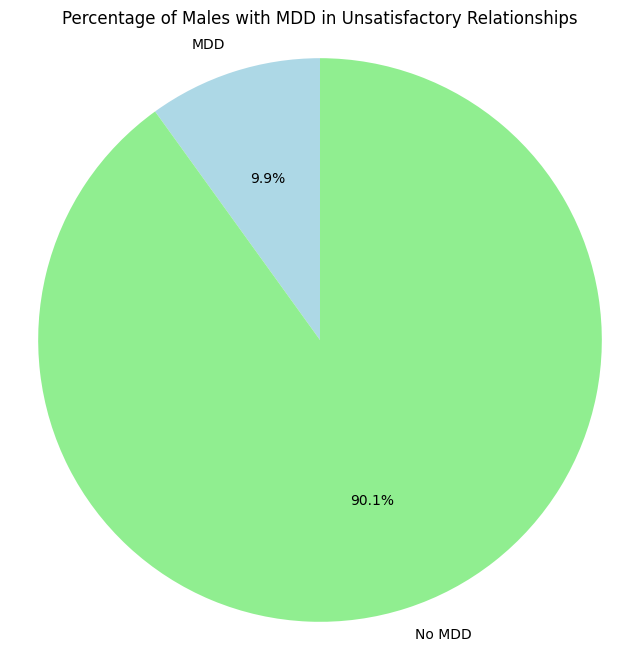

In [80]:
# Function to create a pie chart for given conditions
def create_pie_chart(df, sex, title):
    # Filter DataFrame based on sex and not satisfied in love affair
    df_filtered = df[(df['Sex'] == sex) & (df['Love_Affair_Not_Satisfied'] == 'Yes')]
    # Group by depression status and sum weights for each group
    weighted_counts = df_filtered.groupby('depression_status')['Post_Stratification_Weight'].sum()
    plt.figure(figsize=(8, 8))
    plt.pie(weighted_counts, labels=weighted_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

# Create pie charts for females and males in unsatisfactory relationships
create_pie_chart(df, 'Female', 'Percentage of Females with MDD in Unsatisfactory Relationships')
create_pie_chart(df, 'Male', 'Percentage of Males with MDD in Unsatisfactory Relationships')

Satisfaction with Physical Appearence and Depression

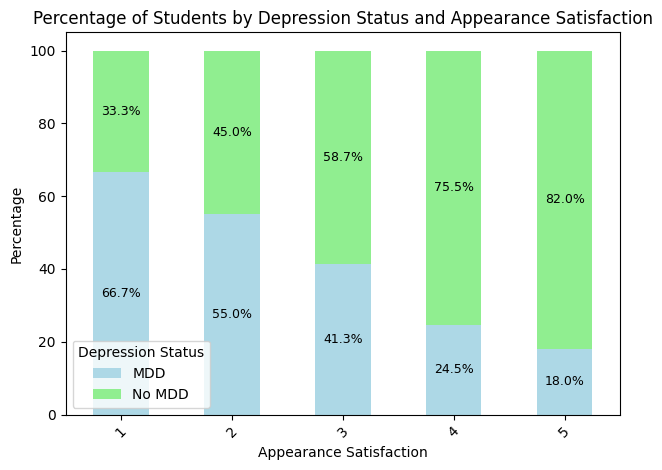

In [71]:

# Group by Appearance_Satisfaction and depression status and sum weights for each group
group_data = df.groupby(['Appearance_Satisfaction', 'depression_status'])['Post_Stratification_Weight'].sum().unstack(fill_value=0)

# Normalize data by Appearance_Satisfaction to get percentages
group_data_percentage = group_data.div(group_data.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
ax = group_data_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'])
plt.title('Percentage of Students by Depression Status and Appearance Satisfaction')
plt.xlabel('Appearance Satisfaction')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Depression Status', loc='lower left')

# Annotating the percentage on each bar
for n, x in enumerate([*group_data_percentage.index.values]):
    for (proportion, y_loc) in zip(group_data_percentage.loc[x],
                                  group_data_percentage.loc[x].cumsum()):
        plt.text(x=n, y=(y_loc - proportion) + (proportion / 2), s=f'{proportion:.1f}%', 
                 ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

PCA PLOT

In [48]:
#Getting the data again
df = pd.read_excel("Data/Visualization_Data.xlsx")

#Let us now remove some of the variables which dont seem to be useful for the classification

# Columns to be removed
columns_to_remove = [
    "Ethnicity", "Currently_Single", "Exercise_Days", "Family_Income", "Family_Interaction", 
    "Family_Visit_Frequency", "Job_Type", "Lecture_Preferance", "Life_Threats", "Living_Parents", 
    "Love_Affair_Not_Satisfied", "Parents_Employment", "Religion", "Residence_Type", "Sleep_Hours", 
    "Sports_Participation", "Uni_Entry_Attempt", "Smoke_Frequency", "Travel_Mode", 'Post_Stratification_Weight'
]

# Remove specified columns
df = df.drop(columns=columns_to_remove)

In [49]:
#Now let us encode the ordinal categorical variables

"""
Accomodation Satisfaction takes on the values 1,2,3,4,5. However, it is more discriminative in predicting 
depression if 1,2 were combined and 4,5 was combined.
"""

# Define a mapping function for Accommodation_Satisfaction
def map_accommodation_satisfaction(value):
    if value in [1, 2]:
        return 1
    elif value == 3:
        return 2
    elif value in [4, 5]:
        return 3

# Apply the mapping function to the Accommodation_Satisfaction column
df['Accommodation_Satisfaction'] = df['Accommodation_Satisfaction'].apply(map_accommodation_satisfaction)


"""

The frequency of socializing takes on the values Less than once a month,
Once a month, 2 to 3 times a month, Once a week, More than once a week.
However, it is more discriminative in predicting 
depression if Less than once a month, Once a month were combined
and Once a week, More than once a week was combined.

"""

# Mapping dictionary for Socializing_Frequency
socializing_map = {
    'Less than once a month': 1,
    'Once a month': 1,
    '2 to 3 times a month': 2,
    'Once a week': 3,
    'More than once a week': 3
}

# Apply the mapping to the Socializing_Frequency column
df['Socializing_Frequency'] = df['Socializing_Frequency'].map(socializing_map)




"""

The frequency of socializing takes on the values Eat 3 meals a day but not necessarily a healthy diet,
Nutritionally Balanced Diet, Unable to eat 3 meals a day, Mostly eating junk food, 
On a diet. However, it is more discriminative in predicting 
depression if Unable to eat 3 meals a day, Mostly eating junk food were combined (As they are unhealthy)
and the rest of the categories were ordinally encoded from the least healthiest category to the most
healthiest category.

"""

# Mapping dictionary for Meal_Type
meal_type_map = {
    'Eat 3 meals a day but not necessarily a healthy diet': 2,
    'Nutritionally Balanced Diet': 4,
    'Unable to eat 3 meals a day': 1,
    'Mostly eating junk food': 1,
    'On a diet': 3
}

# Apply the mapping to the Meal_Type column
df['Meal_Type'] = df['Meal_Type'].map(meal_type_map)

# Mapping dictionary for Alcohol_Frequency
alcohol_frequency_map = {
    'Never': 1,
    'Rarely': 2,
    'Occasionally': 3
}

# Apply the mapping to the Alcohol_Frequency column
df['Alcohol_Frequency'] = df['Alcohol_Frequency'].map(alcohol_frequency_map)


# Mapping dictionary for Travel_Time
travel_time_map = {
    'Less than 1 hour': 1,
    'Between 1 and 3 hours': 2,
    'Between 3 and 5 hours': 3
}

# Apply the mapping to the Travel_Time column
df['Travel_Time'] = df['Travel_Time'].map(travel_time_map)


# Mapping dictionary for Academic_Achievements_Satisfaction
academic_achievements_map = {
    'No': 1,
    'Neither satisfied nor dissatisfied': 2,
    'No GPA as of yet': 2,
    'Yes': 3
}

# Apply the mapping to the Academic_Achievements_Satisfaction column
df['Academic_Achievements_Satisfaction'] = df['Academic_Achievements_Satisfaction'].map(academic_achievements_map)


# Mapping dictionary for Weight_Status
weight_status_map = {
    'Underweight': 1,
    'Healthy Weight': 2,
    'Overweight': 3,
    'Obesity': 4
}

# Apply the mapping to the Weight_Status column
df['Weight_Status'] = df['Weight_Status'].map(weight_status_map)

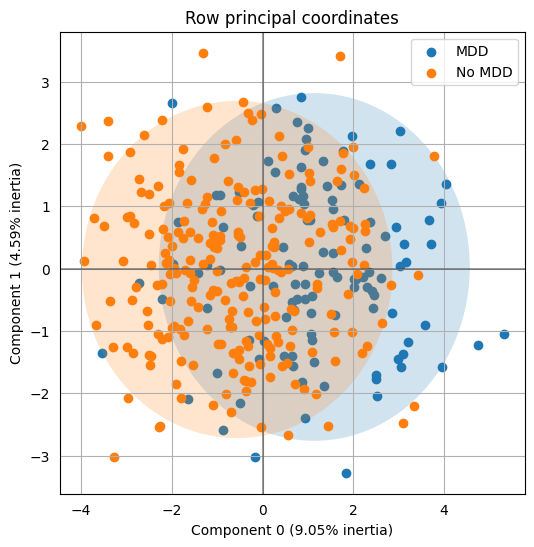

In [50]:
#Now to get the plot of the PCA

#Let us now store the variable associated with depression seperately
Status = df['depression_status']

# goodbye target column
df = df.drop(['depression_status'],axis=1)

# Get categorical variables
catcols = df.select_dtypes(['object']).columns

# convert object columns to categorical columns
df[catcols] = df[catcols].astype('category')

#Identifying PCA and MCA Columns

pca_cols = df.select_dtypes(['number']).columns
mca_cols = df.select_dtypes(['category']).columns

# instantiate MCA values
mca = MCA(n_components = len(mca_cols))
mca = mca.fit(df[mca_cols])
cat_columns_mca = mca.transform(df[mca_cols])

#Collect the PCA Cols and MCA Cols
cols = pd.concat([df[pca_cols], cat_columns_mca],axis=1) 

#nsure all column names are string
cols=cols.rename(str,axis="columns") 

#Standardize the data
ssc=StandardScaler()
mat_ssc=ssc.fit_transform(cols)

#Setup our PCA, n_components control the number of the dimension
pca =PCA(n_components = 2)
#Training and transform our data
pca.fit(cols)
mpg_pca = pca.transform(cols)

#Get the plot
ax = pca.plot_row_coordinates(cols, color_labels=Status)